# Extract Epochs from iEEG in BIDS format

In [1]:
import os
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

!pip install mne --upgrade
import mne

path = r'/content/drive/MyDrive/Colab Notebooks/Project Domino/new Macros'
os.chdir(path)

Requirement already up-to-date: mne in /usr/local/lib/python3.7/dist-packages (0.22.1)


In [2]:
vhdr = [f for f in os.listdir('raw signal') if 'vhdr' in f][0]
raw = mne.io.read_raw_brainvision('raw signal/' + vhdr, scale=0.25, preload=True)

Extracting parameters from raw signal/sub-006_task-Domino_ses-01_ieeg-Macro.vhdr...
Setting channel info structure...
Reading 0 ... 9210221  =      0.000 ...   921.022 secs...


In [3]:
vmrk = [f for f in os.listdir('raw signal') if 'vmrk' in f][0]
with open('raw signal/' + vmrk) as f:
    lines = [l for l in f.readlines() if 'Stimulus' in l]

In [4]:
event_dict = {k:v for k,v in zip([0,1,2,11,12,13,14,15,16], 
                                 ['Choose','Ready','Go','Show match chip',
                                  'Show non match chip','Picked match chip',
                                  'Picked non match chip','NoShow match chip',
                                  'NoShow non match chip'])}
event_dict

{0: 'Choose',
 1: 'Ready',
 2: 'Go',
 11: 'Show match chip',
 12: 'Show non match chip',
 13: 'Picked match chip',
 14: 'Picked non match chip',
 15: 'NoShow match chip',
 16: 'NoShow non match chip'}

In [5]:
_events = [(l.split(','))[2:0:-1] for l in lines]
events = np.array([[e[0], 0, e[1]] for e in _events if int(e[1]) in event_dict.keys()]).astype('int')
events[:10]

array([[ 95849,      0,      0],
       [136397,      0,      1],
       [167050,      0,      2],
       [184924,      0,     13],
       [215807,      0,     11],
       [250911,      0,      0],
       [290843,      0,      1],
       [320873,      0,      2],
       [348605,      0,     14],
       [360951,      0,     16]])

In [6]:
raw.add_events(events, stim_channel='ainp1')
raw.resample(250)

<RawBrainVision | sub-006_task-Domino_ses-01_ieeg-Macro.dat, 59 x 230256 (921.0 s), ~103.7 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


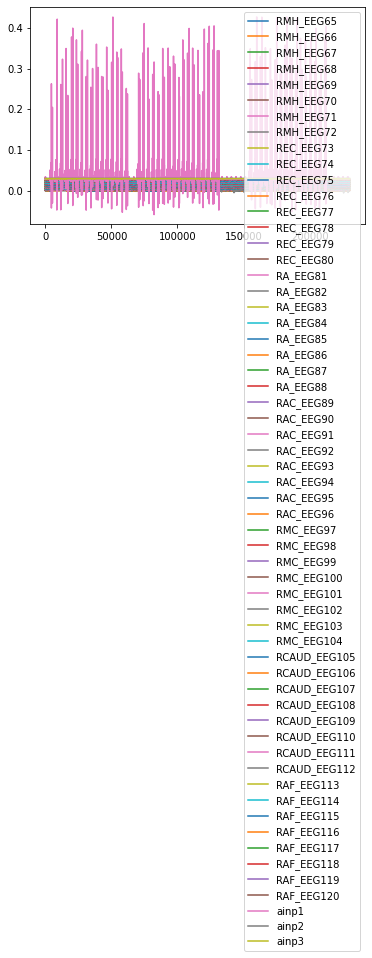

In [25]:
# f_sampling = 250
_ = plt.plot(np.array([x + i*5e-4 for i,x in enumerate(raw._data[:,:])]).T)
lgnd = plt.legend(labels=raw.ch_names, )


In [ ]:
# import pdb; pdb.pm()

# Take interval     [picked - 2(?) : picked + 3 sec]
# Norm with         [choose : choose + 1 sec]
